<a href="https://colab.research.google.com/github/Ratchanontt/BSC_DPDM23/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Test

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

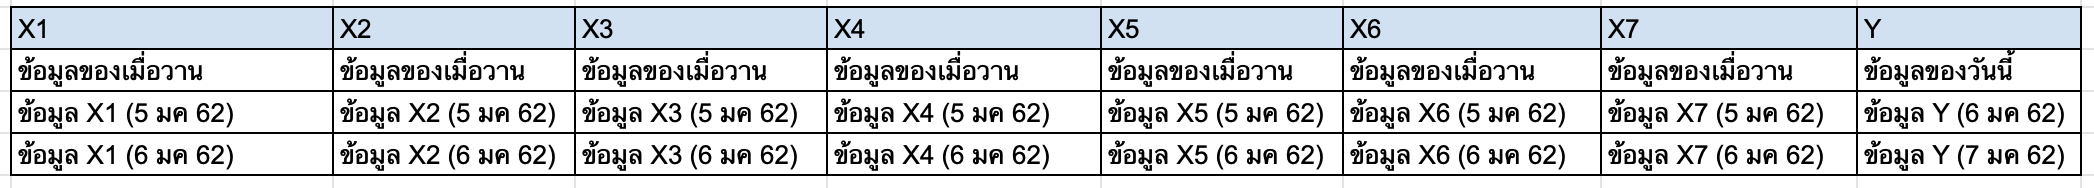

# Import Necessary Library

In [852]:
import os
import pandas as pd
import numpy as np

# Load Data

In [853]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [854]:
os.chdir('/content/drive/MyDrive/Data_BSC_DPDM23')
!pwd # เช็ค path ที่กำลังทำงานอยู่

/content/drive/MyDrive/Data_BSC_DPDM23


In [855]:
path = os.getcwd()
files = os.listdir(path)
files

['2563.xls',
 '2563.gsheet',
 'customer_shopping_data.csv',
 'shopping.csv',
 'reduced_marketbasket.csv',
 'crx.names',
 'crx.data',
 'อุตุ']

## Test Loading

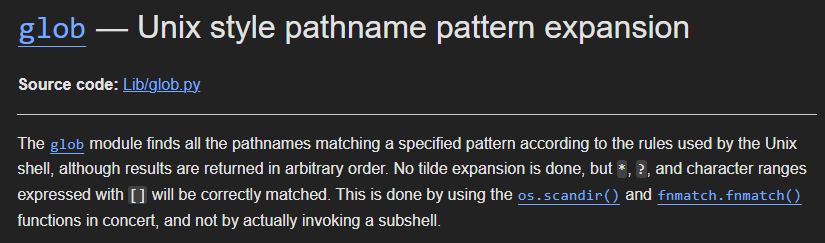

In [856]:
import glob

Airpress = '/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)'
excel_files = glob.glob(Airpress + '/*.xlsx')
all_province = []

for file in excel_files:
    df = pd.read_excel(file, skiprows=3)
    all_province.append(df)

combined_df = pd.concat(all_province, ignore_index=True)

In [857]:
combined_df

,ที่,สถานี,เดือน/ปี,วันที่,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,เฉลี่ย
0,NaN,NaN,NaT,1.00,2.00,3.00,4.00,5.00,6.00,7.00,...,23.00,24.00,25.00,26.00,27.00,28.00,29,30,31,NaN
1,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.84,1007.16,1007.87,1008.56,1010.55,1011.83,1011.24,...,1011.24,1010.80,1012.02,1012.36,1012.42,1012.97,1012.52,1011.87,1012.21,1010.772258
2,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.41,1011.47,1011.22,1011.16,1010.51,1009.26,1008.20,...,1015.21,1016.11,1014.65,1012.96,1011.91,1010.10,1010.78,1011.06,-,1012.255000
3,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1012.16,1013.74,1013.44,1014.00,1013.28,1012.69,1012.57,...,1014.22,1017.34,1019.63,1019.96,1017.56,1017.02,1015.8,1016.96,1017.63,1016.470000
4,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1016.61,1014.92,1013.86,1015.71,1016.87,1017.17,1018.83,...,1012.80,1012.37,1013.47,1013.39,1011.36,1010.64,1011.95,1013.86,1015.52,1013.485484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,48,352201-หนองคาย จ.หนองคาย,2021-10-01,1008.12,1008.74,1008.64,1008.16,1007.42,1005.93,1004.61,...,1015.21,1015.08,1013.52,1012.33,1012.16,1012.33,1013.04,1013.26,1012.96,1009.382903
276,49,352201-หนองคาย จ.หนองคาย,2021-11-01,1013.23,1013.04,1012.50,1011.41,1009.71,1007.97,1007.80,...,1013.18,1014.70,1014.53,1014.41,1015.51,1014.45,1013.37,1013.98,-,1012.167000
277,50,352201-หนองคาย จ.หนองคาย,2021-12-01,1015.80,1017.00,1018.68,1018.13,1017.43,1016.91,1016.72,...,1012.63,1012.30,1013.87,1015.64,1017.06,1017.58,1016.4,1017.83,1018.39,1015.712903
278,1,352201-หนองคาย จ.หนองคาย,2022-01-01,1017.75,1016.89,1015.26,1014.98,1013.66,1014.12,1014.99,...,1010.66,1010.19,1010.22,1010.70,1010.80,1010.52,1008.55,1007.99,1008.91,1012.889032


In [858]:
# combined_df.to_excel('combined_data.xlsx', index=False)

วิธีนี้ไม่เหมาะ เนื่องจาก ข้อมูลใน Column 'สถานี' มันผิดหรือก็คือในชีทจ.ขอนแก่น แต่ในข้อมูลเป็นจ.หนองคาย (ไม่ได้มีการบอกว่ามาจากจังหวัดไหน)

## Air Pressure: ความกดอากาศ (เปอร์เซ็นต์)

In [859]:
Air_Pressure_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
Air_Pressure_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
Air_Pressure_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
Air_Pressure_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
Air_Pressure_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

In [860]:
Air_Pressure_KhonKaen.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


## Relative Humidity: ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)


In [861]:
Relative_Humidity_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx', header = 4)
Relative_Humidity_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx', header = 4)
Relative_Humidity_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx', header = 4)
Relative_Humidity_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx', header = 4)
Relative_Humidity_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx', header = 4)

In [862]:
Relative_Humidity_Loei.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


## Wind Speed: ความเร็วลม (นอต)

In [863]:
Wind_Speed_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx', header = 4)
Wind_Speed_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx', header = 4)
Wind_Speed_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx', header = 4)
Wind_Speed_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx', header = 4)
Wind_Speed_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx', header = 4)

## Number of Clouds: จำนวนเมฆ (10ส่วน)


In [864]:
Num_Clouds_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx', header = 4)
Num_Clouds_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx', header = 4)
Num_Clouds_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx', header = 4)
Num_Clouds_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx', header = 4)
Num_Clouds_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx', header = 4)

## Rainfall: ปริมาณฝน (มิลลิเมตร)

In [865]:
Rainfall_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx', header = 4)
Rainfall_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx', header = 4)
Rainfall_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx', header = 4)
Rainfall_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx', header = 4)
Rainfall_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx', header = 4)

## Dew Point Temperature: อุณหภูมิจุดน้ำค้าง (เซลเซียส)


In [866]:
Dew_Point_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
Dew_Point_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
Dew_Point_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx', header = 4)
Dew_Point_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
Dew_Point_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx', header = 4)

## Minimum Degree: อุณหภูมิต่ำสุด (เซลเซียส)


In [867]:
Min_Degree_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
Min_Degree_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
Min_Degree_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx', header = 4)
Min_Degree_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
Min_Degree_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx', header = 4)

## Dry Bulb: อุณหภูมิตุ้มแห้ง (เซลเซียส)


 อุณหภูมิกระเปาะแห้ง (Dry Bulb) คืออุณหภูมิที่อ่านจากเทอร์โมมิเตอร์ที่กระเปาะแห้ง ในการวัดจะต้องให้กระเปาะอยู่ในอากาศที่ถ่ายเทสะดวก

In [868]:
Dry_Bulb_KhonKaen = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx', header = 4)
Dry_Bulb_NakhonPhanom = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx', header = 4)
Dry_Bulb_SakonNakhon = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx', header = 4)
Dry_Bulb_NongKhai = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx', header = 4)
Dry_Bulb_Loei = pd.read_excel('/content/drive/MyDrive/Data_BSC_DPDM23/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx', header = 4)

# Cleaning Data

## Change Title of Column

สร้าง list สำหรับทำฟังก์ชันวนลูปในแต่ละลักษณะอากาศ โดยเก็บอย่างละ 5 จังหวัด

In [869]:
df_air_list = [Air_Pressure_KhonKaen, Air_Pressure_NakhonPhanom, Air_Pressure_SakonNakhon, Air_Pressure_NongKhai, Air_Pressure_Loei]
df_humidity_list = [Relative_Humidity_KhonKaen, Relative_Humidity_NakhonPhanom, Relative_Humidity_SakonNakhon, Relative_Humidity_NongKhai, Relative_Humidity_Loei]
df_wind_list = [Wind_Speed_KhonKaen, Wind_Speed_NakhonPhanom, Wind_Speed_SakonNakhon, Wind_Speed_NongKhai, Wind_Speed_Loei]
df_cloud_list = [Num_Clouds_KhonKaen, Num_Clouds_NakhonPhanom, Num_Clouds_SakonNakhon, Num_Clouds_NongKhai, Num_Clouds_Loei]
df_rain_list = [Rainfall_KhonKaen, Rainfall_NakhonPhanom, Rainfall_SakonNakhon, Rainfall_NongKhai, Rainfall_Loei]
df_dew_list = [Dew_Point_KhonKaen, Dew_Point_NakhonPhanom, Dew_Point_SakonNakhon, Dew_Point_NongKhai, Dew_Point_Loei]
df_mindegree_list = [Min_Degree_KhonKaen, Min_Degree_NakhonPhanom, Min_Degree_SakonNakhon, Min_Degree_NongKhai, Min_Degree_Loei]
df_bulb_list = [Dry_Bulb_KhonKaen, Dry_Bulb_NakhonPhanom, Dry_Bulb_SakonNakhon, Dry_Bulb_NongKhai, Dry_Bulb_Loei]

In [870]:
def rename_col(df):
  df.rename(columns={'Unnamed: 0': 'ลำดับ', 'Unnamed: 1': 'สถานี', 'Unnamed: 2': 'เดือน/ปี', 'Unnamed: 34': 'ค่าเฉลี่ย'}, inplace=True)
  return df

# ไม่ต้องสนใจ วันที่ ใน col 'Unnamed: 2': 'เดือน/ปี' เพราะ เป็น setting จาก โปรแกรม excel (วันที่ทั้งหมดใน col จะเป็นวันที่1 แค่คนละเดือน-ปี)

In [871]:
df_weather_dict = {
  "ความกดอากาศ": df_air_list,
  "ความชื้นสัมพัทธ์": df_humidity_list,
  "ความเร็วลม": df_wind_list,
  "จำนวนเมฆ": df_cloud_list,
  "ปริมาณฝน": df_rain_list,
  "อุณหภูมิจุดน้ำค้าง": df_dew_list,
  "อุณหภูมิต่ำสุด": df_mindegree_list,
  "อุณหภูมิตุ้มแห้ง": df_bulb_list
}

for category, df_list in df_weather_dict.items():
    for df in df_list:
        rename_col(df)

In [872]:
Min_Degree_NakhonPhanom.head()

,ลำดับ,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,25.0,23.4,22.2,20.6,21.1,21.0,22.5,...,22,22.5,22.2,22.2,22.3,23.5,21.5,20.5,21,22.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,20.4,20.5,19.7,20.6,21.3,23.7,24.4,...,21.7,19.2,18.8,18.8,19.6,20.4,19.8,20.9,-,20.4
2,3,357201-นครพนม จ.นครพนม,2011-12-01,19.4,19.8,14.1,14.5,15,18.1,20.7,...,15.8,19.0,13.2,11.6,12.0,14.6,18.6,17.7,15.8,16.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,15.1,15.5,19.9,21.7,14.9,13.8,15.9,...,20.4,14.6,18.9,14.1,16.3,19.1,18.7,21.3,18.5,17.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,17.3,18.2,21.5,19.1,20.1,21.3,21.4,...,19.5,21.6,21.3,22.5,21.8,18.6,19,-,-,19.2


In [873]:
Air_Pressure_Loei.head()

,ลำดับ,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.12,1006.51,1007.81,1008.15,1009.21,1011.28,1011.22,...,1010.79,1010.25,1011.52,1012.04,1012.00,1012.74,1011.69,1011.27,1011.71,1010.343871
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1012.09,1011.32,1010.99,1011.47,1010.88,1009.62,1008.28,...,1014.79,1015.74,1014.36,1013.30,1011.92,1009.86,1010.1,1010.43,-,1012.078333
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1010.43,1011.81,1012.45,1012.03,1013.29,1013.21,1012.81,...,1013.75,1013.11,1015.95,1018.79,1019.39,1017.88,1016.49,1014.97,1015.62,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.42,1014.07,1012.35,1013.49,1014.99,1015.70,1017.24,...,1010.10,1010.76,1011.11,1011.72,1010.91,1010.31,1010.16,1012.61,1014.4,1012.367419
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.19,1012.82,1013.94,1013.18,1010.99,1008.58,1008.19,...,1005.78,1005.48,1004.96,1005.05,1006.27,1005.59,1006.52,1010.43,-,1009.516667


In [874]:
Relative_Humidity_Loei.head()

,ลำดับ,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,90,95,92,89,86,94,90,...,85,86,83,84,85,85,82,83,85,87
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,85,83,84,83,83,85,83,...,73,77,80,81,80,84,82,79,-,82
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,80,77,77,76,78,83,82,...,80,74,75,74,80,80,78,81,78,77
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,75,78,81,79,73,77,82,...,83,80,83,79,80,78,77,82,79,78
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,79,81,91,84,78,73,69,...,67,68,68,67,76,73,70,-,-,73


In [875]:
Dry_Bulb_Loei.head()

,ลำดับ,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,26.3,25.1,24.4,25.2,25.6,23.7,24.6,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,2,353201-เลย จ.เลย,2011-11-01,25.3,24.7,24.5,24.4,24.9,25.4,25.8,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,-,24.4
2,3,353201-เลย จ.เลย,2011-12-01,23.9,22.9,21.0,20.9,22.3,21.6,23.8,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,1,353201-เลย จ.เลย,2012-01-01,22.7,22.9,24.1,24.3,23.3,23.0,22.2,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,2,353201-เลย จ.เลย,2012-02-01,23.4,24.2,23.2,24.0,25.6,26.3,25.9,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,-,-,25.4


## Drop Column 'สถานี'

In [876]:
def drop_column(df):

  df.drop('สถานี', axis=1, inplace = True)
  return df
# ไม่จำเป็นต้องนำไปวิเคราะห์ เนื่องจาก ข้อมูลจังหวัด ในบางไฟล์คอลัมน์ 'สถานี' กับชื่อไฟล์ ไม่ตรงกัน

In [877]:
for category, df_list in df_weather_dict.items():
    for df in df_list:
        drop_column(df)

In [878]:
Air_Pressure_NakhonPhanom.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1006.30,1007.38,1008.07,1008.44,1010.51,1011.65,1011.24,1010.68,...,1011.09,1010.64,1012.01,1012.47,1012.46,1012.85,1012.43,1011.69,1012.28,1010.754839
1,2,2011-11-01,1012.28,1011.23,1011.08,1010.96,1010.57,1009.20,1007.99,1007.38,...,1015.49,1016.09,1014.62,1012.80,1011.83,1010.00,1010.6,1011.13,-,1012.184667
2,3,2011-12-01,1012.15,1013.75,1013.24,1013.94,1013.35,1012.62,1012.48,1012.96,...,1014.23,1017.58,1019.77,1019.71,1017.34,1017.01,1015.64,1016.89,1017.73,1016.470000
3,1,2012-01-01,1016.56,1014.88,1013.41,1015.85,1016.94,1017.13,1019.21,1019.57,...,1013.13,1012.45,1013.59,1013.15,1011.56,1010.71,1011.95,1013.77,1015.5,1013.510000
4,2,2012-02-01,1013.98,1013.75,1014.96,1013.52,1011.85,1008.82,1008.15,1011.78,...,1005.76,1005.13,1004.94,1006.42,1008.93,1007.88,1007.29,1011.13,-,1010.608000


In [879]:
Dew_Point_NakhonPhanom.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,25.1,23.1,20.1,18.9,20.7,21.1,21.7,22.2,...,20.0,20.7,20.7,20.8,21.0,20.3,19.8,19.3,19.3,21.200000
1,2,2011-11-01,19.2,18.8,19.1,19.8,20.3,20.9,21.7,20.6,...,18.1,16.5,17.5,20.2,19.7,19.5,18.6,18.5,-,18.896667
2,3,2011-12-01,17.6,12.7,12.2,14.1,16.0,18.5,19.7,17.2,...,14.4,10.3,9.0,9.6,13.7,15.8,16,16.2,15.7,14.041935
3,1,2012-01-01,15.6,16.4,17.1,14.7,13.8,14.7,14.0,13.9,...,15.8,16.1,13.4,14.7,17.4,18.7,16.2,15.5,14.6,16.664516
4,2,2012-02-01,16.3,17.8,16.6,17.9,19.3,20.7,19.6,16.4,...,18.4,19.6,20.3,19.7,17.4,17.7,19.9,18.5,-,17.546667


### ตัดข้อมูลที่ไม่จำเป็น

จาก Column ที่เกินมาใน `[16, 35]` ของไฟล์ จำนวนเมฆ(10ส่วน) จ.เลย

In [880]:
Num_Clouds_Loei.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1,2011-10-01,8,10,10,9,8,10,10,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2011-11-01,2,1,2,1,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2011-12-01,1,3,1,3,3,2,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2012-01-01,1,1,3,6,6,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2012-02-01,8,5,10,7,1,0,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [881]:
Num_Clouds_Loei = Num_Clouds_Loei.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [882]:
Num_Clouds_Loei.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,8,10,10,9,8,10,10,7,...,1,1,2,4,2,3,3,1,2,5.387097
1,2,2011-11-01,2,1,2,1,1,1,2,2,...,6,4,0,1,2,2,5,3,-,2.333333
2,3,2011-12-01,1,3,1,3,3,2,3,5,...,3,1,1,0,0,1,1,4,1,2.354839
3,1,2012-01-01,1,1,3,6,6,2,1,1,...,2,4,6,5,1,2,4,9,8,3.870968
4,2,2012-02-01,8,5,10,7,1,0,-,-,...,-,-,-,0,1,3,-,3,-,2.809524


## Check & Fix Missing value

In [883]:
Air_Pressure_KhonKaen.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667


In [884]:
Air_Pressure_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

### แทนที่ `-` ด้วย `NaN`
เนื่องจาก Missing value ของชุดข้อมูลแทนเป็นค่า `- `

In [885]:
def replace_nan(df):

  df.replace('-', np.NaN, inplace = True)
  return df

In [886]:
#ความกดอากาศ
for df in df_air_list:
  replace_nan(df)

#ความชื้นสัมพัทธ์
for df in df_humidity_list:
  replace_nan(df)

#ความเร็วลม
for df in df_wind_list:
  replace_nan(df)

#จำนวนเมฆ
for df in df_cloud_list:
  replace_nan(df)

# อุณหภูมิจุดน้ำค้าง
for df in df_dew_list:
  replace_nan(df)

#อุณหภูมิต่ำสุด
for df in df_mindegree_list:
  replace_nan(df)

#อุณหภูมิตุ้มแห้ง
for df in df_bulb_list:
  replace_nan(df)

In [887]:
Num_Clouds_KhonKaen.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,9,10,10.0,8,10,10,10,7,...,2,3,5,3,3,5,4.0,2.0,2.0,6.322581
1,2,2011-11-01,2,2,2.0,2,3,6,9,6,...,6,6,3,2,2,1,3.0,2.0,NaN,3.533333
2,3,2011-12-01,2,3,4.0,4,5,8,7,6,...,5,5,3,3,1,2,1.0,1.0,1.0,3.516129
3,1,2012-01-01,1,4,7.0,6,3,1,3,3,...,6,4,4,3,2,5,6.0,10.0,10.0,5.354839
4,2,2012-02-01,6,6,8.0,8,3,3,1,2,...,1,2,0,1,4,5,1.0,2.0,NaN,2.533333


จาก Rainfall หรือปริมาณน้ำฝนมีค่าเป็น `-` และ `T`

เกณฑ์การตรวจวัดฝนมีดังนี้

* ฝนวัดจำนวนไม่ได ้(Trace)          มีปริมาณฝนไม่ถึง 0.1 มิลลิเมตร
* ฝนเล็กน้อย (Light rain)               มีปริมาณฝนตั้งแต่ 0.1 มิลลิเมตร 10.0 มิลลิเมตร
* ฝนปานกลาง (Moderate rain)     มีปริมาณฝนตั้งแต่ 10.1 มิลลิเมตร 35.0 มิลลิเมตร
* ฝนหนัก (Heavy rain)                 มีปริมาณฝนตั้งแต่ 35.1 มิลลิเมตร 90.0 มิลลิเมตร
* ฝนหนักมาก (Very heavy rain)    มีปริมาณฝนตั้งแต่ 90.1 มิลลิเมตรขึ้นไป

อ้างอิง: http://www.arcims.tmd.go.th/dailydata/DetailDailyRain.html

In [888]:
#ปริมาณฝน
for df in df_rain_list:
  replace_nan(df)

In [889]:
Rainfall_SakonNakhon.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,84.8,28.1,0.0,T,5.5,0.3,0,0.3,...,0.0,0,0.0,0,0,0,1.0,0,0,200.8
1,2,2011-11-01,0.0,0.0,0.0,0,T,T,2.8,0,...,0.0,0,0.0,0,0,0,0.0,0,NaN,2.8
2,3,2011-12-01,0.0,0.0,0.0,0,0,0,0,0,...,0.0,0,0.0,0,0,0,0.0,0,0,NaN
3,1,2012-01-01,0.0,0.0,0.0,0,0,0,0,0,...,0.9,0,0.0,0,0,0,0.0,0,0,30.4
4,2,2012-02-01,0.0,0.0,0.0,0,0,0,0,0,...,0.0,0,0.0,0.4,5.6,0,0.0,NaN,NaN,6


จากฝนที่มีปริมาณไม่ถึง 0.1 มิลลิเมตร แสดงว่า วัดจำนวนไม่ได้ (Trace)

In [890]:
# 0.09 มีค่าใกล้เคียงกับ 0.1 มากที่สุด
for df in df_rain_list:
  df.replace('T', 0.09, inplace = True)

In [891]:
Rainfall_SakonNakhon.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,84.8,28.1,0.0,0.09,5.50,0.30,0.0,0.3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,2011-11-01,0.0,0.0,0.0,0.00,0.09,0.09,2.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.8
2,3,2011-12-01,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1,2012-01-01,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,2012-02-01,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,NaN,NaN,6.0


### เพิ่มข้อมูลในส่วนที่หายไปให้เท่ากัน

Dew_Point (อุณหภูมิจุดน้ำค้าง) และ Dry_Bulb (อุณหภูมิตุ้มแห้ง) มี 50 แถว ในขณะที่ลักษณะอื่นๆ มี 55 แถว ก็คือ Row หายไป 5 row


In [892]:
Rainfall_Loei.shape #ใช้ตารางปริมาณฝนเป็นตารางอ้างอิง เนื่องจากต้องการทำนายปริมาณฝน

(55, 34)

In [893]:
Dew_Point_Loei.shape

(50, 34)

In [894]:
Dry_Bulb_Loei.shape

(50, 34)

In [895]:
test = Dew_Point_Loei.iloc[:,2:35]
test

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,23.6,23.5,21.9,21.9,21.8,21.6,21.7,22.6,22.6,22.4,...,21.0,21.5,21.2,21.0,21.6,21.3,21.0,20.2,20.2,21.793548
1,20.1,19.5,19.5,19.1,19.5,20.5,20.6,20.8,20.5,18.9,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,NaN,18.953333
2,18.0,16.6,15.0,14.6,15.3,16.7,18.9,20.2,15.5,14.0,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,16.2,16.4,17.6,18.2,15.2,16.1,17.0,15.0,13.6,13.7,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,17.8,18.8,20.7,19.1,19.5,18.2,16.4,16.4,17.9,19.3,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,NaN,NaN,17.310345
5,22.1,21.9,22.4,23.1,23.4,23.2,22.2,21.7,22.1,21.6,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,28.4,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,NaN,26.736667
7,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,24.5,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,13.1,15.5,16.1,15.6,15.3,15.0,15.3,16.3,17.1,14.7,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18.0,19.2,16.041935
9,18.2,19.0,18.2,17.9,17.9,19.0,17.5,15.6,17.8,17.6,...,13.6,13.9,16.8,18.3,18.6,20.1,NaN,NaN,NaN,17.600000


In [896]:
test2 = Dry_Bulb_Loei.iloc[:,2:35]
test2

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,26.3,25.1,24.4,25.2,25.6,23.7,24.6,26.2,26.0,27.1,...,25.8,26.1,26.1,26.2,25.9,25.6,26.3,25.6,24.8,25.6
1,25.3,24.7,24.5,24.4,24.9,25.4,25.8,26.3,24.5,22.5,...,26.3,23.6,22.9,23.3,24.5,24.1,25.5,25.5,NaN,24.4
2,23.9,22.9,21.0,20.9,22.3,21.6,23.8,26.0,24.3,21.7,...,21.8,19.8,16.6,16.4,17.6,21.1,22.7,22.6,23.2,21.1
3,22.7,22.9,24.1,24.3,23.3,23.0,22.2,21.3,20.9,20.7,...,25.2,24.4,23.5,22.8,23.4,24.9,25.5,23.5,23.5,23.3
4,23.4,24.2,23.2,24.0,25.6,26.3,25.9,25.4,25.2,26.5,...,25.5,25.9,26.9,26.8,26.5,26.7,26.7,NaN,NaN,25.4
5,26.4,26.9,25.3,25.9,26.6,26.3,26.3,24.7,26.3,26.7,...,26.9,26.4,27.2,26.8,27.4,27.4,27.9,27.9,27.4,26.8
6,26.1,25.3,26.2,26.2,26.9,27.3,27.8,27.9,28.1,28.4,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,NaN,26.7
7,27.6,27.6,25.8,26.6,26.4,25.4,24.9,25.3,24.9,24.5,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.5
8,19.5,22.2,23.8,23.2,22.2,21.6,21.8,22.8,24.0,22.8,...,24.4,25.3,24.6,25.0,23.1,22.0,23.6,24.0,21.5,22.9
9,22.3,23.4,23.8,25.9,25.9,26.9,27.4,26.5,25.9,26.7,...,25.2,24.7,26.1,28.4,29.6,29.0,NaN,NaN,NaN,26.4


เพิ่มแถวและข้อมูลด้วยค่าเฉลี่ย

In [897]:
def calculate_average(df):
  return df.iloc[:,2:35].mean().tolist()

In [898]:
def insert_average(df, avg_list):
  for i in range(32):
    df[i+1] = avg_list[i]

In [899]:
df_insert_dict = {
  "Rainfall_Loei": Rainfall_Loei,
  "Dew_Point_Loei": Dew_Point_Loei,
  "Dry_Bulb_Loei": Dry_Bulb_Loei
}

avg_dict = {
  "Dew_Point_Loei": calculate_average(Dew_Point_Loei),
  "Dry_Bulb_Loei": calculate_average(Dry_Bulb_Loei)
}

In [900]:
for df_name, df in df_insert_dict.items():
  if df_name != "Rainfall_Loei":
    continue

  row_dew = df.iloc[50:,:3]
  row_bulb = df.iloc[50:,:3]

  insert_average(row_dew, avg_dict["Dew_Point_Loei"])
  insert_average(row_bulb, avg_dict["Dry_Bulb_Loei"])

  row_dew.rename(columns={32:'ค่าเฉลี่ย'}, inplace=True)
  row_bulb.rename(columns={32:'ค่าเฉลี่ย'}, inplace=True)

In [901]:
row_dew

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
51,49,2021-11-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
52,50,2021-12-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
53,1,2022-01-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
54,2,2022-02-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843


In [902]:
row_bulb

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
51,49,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
52,50,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
53,1,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
54,2,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246


In [903]:
Dew_Point_Loei =pd.concat([Dew_Point_Loei,row_dew])
Dry_Bulb_Loei =pd.concat([Dry_Bulb_Loei,row_bulb])

In [904]:
Dew_Point_Loei.tail()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
51,49,2021-11-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
52,50,2021-12-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
53,1,2022-01-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843
54,2,2022-02-01,18.738,18.878,18.78,18.638,18.648,18.58,18.75,18.712,...,18.342,18.078,17.98,17.886,18.14,18.436,18.281395,18.3025,17.146667,18.343843


In [905]:
Dry_Bulb_Loei.tail()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
51,49,2021-11-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
52,50,2021-12-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
53,1,2022-01-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246
54,2,2022-02-01,24.246,24.356,24.26,24.388,24.338,24.32,24.43,24.498,...,24.566,24.228,24.19,24.188,24.132,24.446,24.165116,23.99,23.32,24.246


### เติมค่า Missing Value ด้วยค่าเฉลี่ย

#### Checking from list

```
df_air_list = [Air_Pressure_KhonKaen, Air_Pressure_NakhonPhanom, Air_Pressure_SakonNakhon, Air_Pressure_NongKhai, Air_Pressure_Loei]
df_humidity_list = [Relative_Humidity_KhonKaen, Relative_Humidity_NakhonPhanom, Relative_Humidity_SakonNakhon, Relative_Humidity_NongKhai, Relative_Humidity_Loei]
df_wind_list = [Wind_Speed_KhonKaen, Wind_Speed_NakhonPhanom, Wind_Speed_SakonNakhon, Wind_Speed_NongKhai, Wind_Speed_Loei]
df_cloud_list = [Num_Clouds_KhonKaen, Num_Clouds_NakhonPhanom, Num_Clouds_SakonNakhon, Num_Clouds_NongKhai, Num_Clouds_Loei]
df_rain_list = [Rainfall_KhonKaen, Rainfall_NakhonPhanom, Rainfall_SakonNakhon, Rainfall_NongKhai, Rainfall_Loei]
df_dew_list = [Dew_Point_KhonKaen, Dew_Point_NakhonPhanom, Dew_Point_SakonNakhon, Dew_Point_NongKhai, Dew_Point_Loei]
df_mindegree_list = [Min_Degree_KhonKaen, Min_Degree_NakhonPhanom, Min_Degree_SakonNakhon, Min_Degree_NongKhai, Min_Degree_Loei]
df_bulb_list = [Dry_Bulb_KhonKaen, Dry_Bulb_NakhonPhanom, Dry_Bulb_SakonNakhon, Dry_Bulb_NongKhai, Dry_Bulb_Loei]
```






In [906]:
air_missing_values = []
humidity_missing_values = []
wind_missing_values = []
cloud_missing_values = []
rain_missing_values = []
dew_missing_values = []
mindegree_missing_values = []
bulb_missing_values = []


for category, df_list in zip([
     "Air Pressure", "Relative Humidity", "Wind Speed", "Number of Clouds", "Rainfall",
    "Dew Point", "Minimum Degree", "Dry Bulb"],
     [df_air_list, df_humidity_list, df_wind_list, df_cloud_list, df_rain_list,
      df_dew_list, df_mindegree_list, df_bulb_list]):

  for df in df_list:
    missing_values = df.isnull().any()
    if missing_values.any():
      if category == "Air Pressure":
        air_missing_values.append(missing_values.idxmax())
      elif category == "Relative Humidity":
        humidity_missing_values.append(missing_values.idxmax())
      elif category == "Wind Speed":
        wind_missing_values.append(missing_values.idxmax())
      elif category == "Number of Clouds":
        cloud_missing_values.append(missing_values.idxmax())
      elif category == "Rainfall":
        rain_missing_values.append(missing_values.idxmax())
      elif category == "Dew Point":
        dew_missing_values.append(missing_values.idxmax())
      elif category == "Minimum Degree":
        mindegree_missing_values.append(missing_values.idxmax())
      elif category == "Dry Bulb":
        bulb_missing_values.append(missing_values.idxmax())

# Print results
print("Air Pressure: Missing values in columns:", air_missing_values)
print("Relative Humidity: Missing values in columns:", humidity_missing_values)
print("Wind Speed: Missing values in columns:", wind_missing_values)
print("Number of Clouds: Missing values in columns:", cloud_missing_values)
print("Rainfall: Missing values in columns:", rain_missing_values)
print("Dew Point: Missing values in columns:", dew_missing_values)
print("Minimum Degree: Missing values in columns:", mindegree_missing_values)
print("Dry Bulb: Missing values in columns:", bulb_missing_values)

Air Pressure: Missing values in columns: [29, 29, 29, 29, 29]
Relative Humidity: Missing values in columns: [29, 29, 29, 29, 29]
Wind Speed: Missing values in columns: [3, 4, 4, 4, 5]
Number of Clouds: Missing values in columns: [3, 1, 1, 1, 1]
Rainfall: Missing values in columns: [1, 1, 1, 1, 1]
Dew Point: Missing values in columns: [29, 29, 29, 29, 29]
Minimum Degree: Missing values in columns: [18, 5, 'ลำดับ', 28, 1]
Dry Bulb: Missing values in columns: [29, 29, 29, 29, 29]


เติม 'ลำดับ' ที่หายไปใน Min_Degree_SakonNakhon

Minimum Degree: Missing values in columns: [18, 5, 'ลำดับ', 28, 1]

Min_Degree_KhonKaen, Min_Degree_NakhonPhanom, `Min_Degree_SakonNakhon`, Min_Degree_NongKhai, Min_Degree_Loei


In [907]:
Min_Degree_SakonNakhon.tail()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,26.1,25.0,24.1,23.3,24.0,24.1,23.5,24.5,...,19.9,19.6,19.5,19.5,20.5,23.0,22.9,23.4,22.9,23.0
51,49,2021-11-01,23.3,23.0,22.1,20.0,22.8,22.6,23.5,22.4,...,19.6,17.5,17.6,16.9,17.1,16.0,17.3,17.4,NaN,20.1
52,50,2021-12-01,16.3,15.3,13.4,11.5,11.5,14.1,12.7,13.9,...,16.8,18.1,19.6,19.8,18.4,15.8,16.6,17.0,NaN,16.3
53,NaN,2022-01-01,15.5,16.0,16.0,18.2,16.0,17.7,17.2,17.5,...,20.2,17.9,20.1,21.9,19.9,20.3,19.6,22.0,19.6,18.2
54,2,2022-02-01,17.4,17.7,17.8,17.0,16.4,15.7,18.5,20.0,...,13.0,12.0,12.3,14.0,16.1,NaN,NaN,NaN,NaN,17.0


In [908]:
# Min_Degree_SakonNakhon["ลำดับ"]

In [909]:
Min_Degree_SakonNakhon.iloc[53, 0] = '1'

In [910]:
Min_Degree_SakonNakhon.tail()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
50,48,2021-10-01,26.1,25.0,24.1,23.3,24.0,24.1,23.5,24.5,...,19.9,19.6,19.5,19.5,20.5,23.0,22.9,23.4,22.9,23.0
51,49,2021-11-01,23.3,23.0,22.1,20.0,22.8,22.6,23.5,22.4,...,19.6,17.5,17.6,16.9,17.1,16.0,17.3,17.4,NaN,20.1
52,50,2021-12-01,16.3,15.3,13.4,11.5,11.5,14.1,12.7,13.9,...,16.8,18.1,19.6,19.8,18.4,15.8,16.6,17.0,NaN,16.3
53,1,2022-01-01,15.5,16.0,16.0,18.2,16.0,17.7,17.2,17.5,...,20.2,17.9,20.1,21.9,19.9,20.3,19.6,22.0,19.6,18.2
54,2,2022-02-01,17.4,17.7,17.8,17.0,16.4,15.7,18.5,20.0,...,13.0,12.0,12.3,14.0,16.1,NaN,NaN,NaN,NaN,17.0


In [911]:
range(len(Relative_Humidity_KhonKaen['ลำดับ']))

range(0, 55)

In [912]:
Relative_Humidity_KhonKaen.iloc[1,:]

ลำดับ                        2  
เดือน/ปี     2011-11-01 00:00:00
1                             71
2                             65
3                             68
4                             65
5                             65
6                             68
7                             69
8                             69
9                             80
10                            83
11                            75
12                            66
13                            66
14                            64
15                            66
16                            67
17                            68
18                            70
19                            66
20                            62
21                            65
22                            69
23                            65
24                            66
25                            65
26                            67
27                            68
28                            67
29        

#### Fill NaN
สามารถแทนที่ NaN ด้วยค่าเฉลี่ยได้ทุกลักษณะ ยกเว้น  Rainfall (ปริมาณฝน) เนื่องจาก บางข้อมูลไม่มีค่าเฉลี่ย

In [913]:
Rainfall_KhonKaen

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1.40,17.7,3.00,0.00,2.20,0.50,1.30,0.20,...,0.00,0.00,0.09,0.00,0.50,1.1,0.0,0.00,0.00,176.80
1,2,2011-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.20,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,NaN,11.80
2,3,2011-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,NaN
3,1,2012-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.09,0.00,38.70
4,2,2012-02-01,0.00,0.0,0.09,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,0.09
5,3,2012-10-01,0.00,0.0,0.00,0.09,0.30,0.00,21.90,11.10,...,0.00,0.00,0.00,1.10,0.00,0.0,0.0,0.00,0.00,34.40
6,4,2012-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,30.00,0.00,0.00,0.0,0.0,0.00,NaN,30.00
7,5,2012-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,NaN
8,6,2013-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,2.00,5.4,0.0,0.09,0.00,7.40
9,7,2013-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN


In [914]:
# df_air_list = [Air_Pressure_KhonKaen, Air_Pressure_NakhonPhanom, Air_Pressure_SakonNakhon, Air_Pressure_NongKhai, Air_Pressure_Loei]
# df_humidity_list = [Relative_Humidity_KhonKaen, Relative_Humidity_NakhonPhanom, Relative_Humidity_SakonNakhon, Relative_Humidity_NongKhai, Relative_Humidity_Loei]
# df_wind_list = [Wind_Speed_KhonKaen, Wind_Speed_NakhonPhanom, Wind_Speed_SakonNakhon, Wind_Speed_NongKhai, Wind_Speed_Loei]
# df_cloud_list = [Num_Clouds_KhonKaen, Num_Clouds_NakhonPhanom, Num_Clouds_SakonNakhon, Num_Clouds_NongKhai, Num_Clouds_Loei]
# df_rain_list = [Rainfall_KhonKaen, Rainfall_NakhonPhanom, Rainfall_SakonNakhon, Rainfall_NongKhai, Rainfall_Loei]
# df_dew_list = [Dew_Point_KhonKaen, Dew_Point_NakhonPhanom, Dew_Point_SakonNakhon, Dew_Point_NongKhai, Dew_Point_Loei]
# df_mindegree_list = [Min_Degree_KhonKaen, Min_Degree_NakhonPhanom, Min_Degree_SakonNakhon, Min_Degree_NongKhai, Min_Degree_Loei]
# df_bulb_list = [Dry_Bulb_KhonKaen, Dry_Bulb_NakhonPhanom, Dry_Bulb_SakonNakhon, Dry_Bulb_NongKhai, Dry_Bulb_Loei]

In [915]:
df_ExceptRainfall_dict = {
  "ความกดอากาศ": df_air_list,
  "ความชื้นสัมพัทธ์": df_humidity_list,
  "ความเร็วลม": df_wind_list,
  "จำนวนเมฆ": df_cloud_list,
  "อุณหภูมิจุดน้ำค้าง": df_dew_list,
  "อุณหภูมิต่ำสุด": df_mindegree_list,
  "อุณหภูมิตุ้มแห้ง": df_bulb_list
}

for category, df_list in df_ExceptRainfall_dict.items():
    for df in df_list:
      for i in range(len(df['ลำดับ'])):
         df.iloc[i,:] = df.iloc[i,:].fillna(df.iloc[i]['ค่าเฉลี่ย'])

In [916]:
air_missing_values = []
humidity_missing_values = []
wind_missing_values = []
cloud_missing_values = []
rain_missing_values = []
dew_missing_values = []
mindegree_missing_values = []
bulb_missing_values = []


for category, df_list in zip([
     "Air Pressure", "Relative Humidity", "Wind Speed", "Number of Clouds", "Rainfall",
    "Dew Point", "Minimum Degree", "Dry Bulb"],
     [df_air_list, df_humidity_list, df_wind_list, df_cloud_list, df_rain_list,
      df_dew_list, df_mindegree_list, df_bulb_list]):

  for df in df_list:
    missing_values = df.isnull().any()
    if missing_values.any():
      if category == "Air Pressure":
        air_missing_values.append(missing_values.idxmax())
      elif category == "Relative Humidity":
        humidity_missing_values.append(missing_values.idxmax())
      elif category == "Wind Speed":
        wind_missing_values.append(missing_values.idxmax())
      elif category == "Number of Clouds":
        cloud_missing_values.append(missing_values.idxmax())
      elif category == "Rainfall":
        rain_missing_values.append(missing_values.idxmax())
      elif category == "Dew Point":
        dew_missing_values.append(missing_values.idxmax())
      elif category == "Minimum Degree":
        mindegree_missing_values.append(missing_values.idxmax())
      elif category == "Dry Bulb":
        bulb_missing_values.append(missing_values.idxmax())

# Print results
print("Air Pressure: Missing values in columns:", air_missing_values)
print("Relative Humidity: Missing values in columns:", humidity_missing_values)
print("Wind Speed: Missing values in columns:", wind_missing_values)
print("Number of Clouds: Missing values in columns:", cloud_missing_values)
print("Rainfall: Missing values in columns:", rain_missing_values)
print("Dew Point: Missing values in columns:", dew_missing_values)
print("Minimum Degree: Missing values in columns:", mindegree_missing_values)
print("Dry Bulb: Missing values in columns:", bulb_missing_values)

Air Pressure: Missing values in columns: []
Relative Humidity: Missing values in columns: []
Wind Speed: Missing values in columns: []
Number of Clouds: Missing values in columns: []
Rainfall: Missing values in columns: [1, 1, 1, 1, 1]
Dew Point: Missing values in columns: []
Minimum Degree: Missing values in columns: []
Dry Bulb: Missing values in columns: []


#### Fill NaN in Rainfall
หากขึ้น NaN แสดงว่า ในวันนั้นไม่มีฝนตก

In [917]:
Rainfall_KhonKaen.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1.4,17.7,3.00,0.0,2.2,0.5,1.3,0.2,...,0.0,0.0,0.09,0.0,0.5,1.1,0.0,0.00,0.0,176.80
1,2,2011-11-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.2,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN,11.80
2,3,2011-12-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,NaN
3,1,2012-01-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.09,0.0,38.70
4,2,2012-02-01,0.0,0.0,0.09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN,0.09


##### ลบคอลัมน์ 'ค่าเฉลี่ย' ในตาราง Rainfall ออก
เนื่องจาก คอลัมน์ 'ค่าเฉลี่ย' ในตาราง Rainfall มันคือ ผลรวมของปริมาณฝน ไม่ใช่ค่าเฉลี่ย

In [918]:
def drop_avg(df):

  df.drop(columns='ค่าเฉลี่ย', inplace=True)
  return df

In [919]:
for df in df_rain_list:
  drop_avg(df)

In [920]:
Rainfall_KhonKaen.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,1,2011-10-01,1.4,17.7,3.00,0.0,2.2,0.5,1.3,0.2,...,0.0,0.0,0.0,0.09,0.0,0.5,1.1,0.0,0.00,0.0
1,2,2011-11-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.2,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,NaN
2,3,2011-12-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
3,1,2012-01-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.09,0.0
4,2,2012-02-01,0.0,0.0,0.09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,NaN,NaN


##### เติม 0 ลงในค่า NaN เนื่องจาก NaN หมายความว่า ในวันนั้นไม่มีฝนตก
คาดว่าเป็นวิธีที่ดีที่สุด

In [921]:
Rainfall_KhonKaen

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,1,2011-10-01,1.40,17.7,3.00,0.00,2.20,0.50,1.30,0.20,...,0.0,0.00,0.00,0.09,0.00,0.50,1.1,0.0,0.00,0.00
1,2,2011-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.20,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,NaN
2,3,2011-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
3,1,2012-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.09,0.00
4,2,2012-02-01,0.00,0.0,0.09,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN
5,3,2012-10-01,0.00,0.0,0.00,0.09,0.30,0.00,21.90,11.10,...,0.0,0.00,0.00,0.00,1.10,0.00,0.0,0.0,0.00,0.00
6,4,2012-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,30.00,0.00,0.00,0.0,0.0,0.00,NaN
7,5,2012-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
8,6,2013-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,2.00,5.4,0.0,0.09,0.00
9,7,2013-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,NaN,NaN,NaN


In [922]:
for df in df_rain_list:
  df.fillna(0, inplace=True)

In [923]:
Rainfall_KhonKaen

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,22,23,24,25,26,27,28,29,30,31
0,1,2011-10-01,1.40,17.7,3.00,0.00,2.20,0.50,1.30,0.20,...,0.0,0.00,0.00,0.09,0.00,0.50,1.1,0.0,0.00,0.00
1,2,2011-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.20,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
2,3,2011-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
3,1,2012-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.09,0.00
4,2,2012-02-01,0.00,0.0,0.09,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
5,3,2012-10-01,0.00,0.0,0.00,0.09,0.30,0.00,21.90,11.10,...,0.0,0.00,0.00,0.00,1.10,0.00,0.0,0.0,0.00,0.00
6,4,2012-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,30.00,0.00,0.00,0.0,0.0,0.00,0.00
7,5,2012-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00
8,6,2013-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,2.00,5.4,0.0,0.09,0.00
9,7,2013-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00


เพิ่มคอลัมน์ 'ค่าเฉลี่ย' ใหม่ลงในตาราง Rainfall

In [924]:
def calculate_average(df):
  df['ค่าเฉลี่ย'] = df.mean(axis=1)

calculate_average(Rainfall_KhonKaen)
calculate_average(Rainfall_NakhonPhanom)
calculate_average(Rainfall_SakonNakhon)
calculate_average(Rainfall_NongKhai)
calculate_average(Rainfall_Loei)

<ipython-input-924-f8bd00383b62>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df['ค่าเฉลี่ย'] = df.mean(axis=1)
<ipython-input-924-f8bd00383b62>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['ค่าเฉลี่ย'] = df.mean(axis=1)
<ipython-input-924-f8bd00383b62>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df['ค่าเฉลี่ย'] = df.mean(axis=1)
<ipython-input-924-f8bd00383b62>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['ค่าเฉลี่ย'] = df.mean(axis

In [925]:
for df in df_rain_list:
  df['ค่าเฉลี่ย'] = df.mean(axis=1)

<ipython-input-925-c9a4f2dd1178>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df['ค่าเฉลี่ย'] = df.mean(axis=1)
<ipython-input-925-c9a4f2dd1178>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['ค่าเฉลี่ย'] = df.mean(axis=1)


In [926]:
Rainfall_KhonKaen.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1.4,17.7,3.00,0.0,2.2,0.5,1.3,0.2,...,0.0,0.0,0.09,0.0,0.5,1.1,0.0,0.00,0.0,5.706129
1,2,2011-11-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,3.2,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.380645
2,3,2011-12-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.000000
3,1,2012-01-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.09,0.0,1.254194
4,2,2012-02-01,0.0,0.0,0.09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.002903


In [927]:
Rainfall_KhonKaen

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,2011-10-01,1.40,17.7,3.00,0.00,2.20,0.50,1.30,0.20,...,0.00,0.00,0.09,0.00,0.50,1.1,0.0,0.00,0.00,5.706129
1,2,2011-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,3.20,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.380645
2,3,2011-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.000000
3,1,2012-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.09,0.00,1.254194
4,2,2012-02-01,0.00,0.0,0.09,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.002903
5,3,2012-10-01,0.00,0.0,0.00,0.09,0.30,0.00,21.90,11.10,...,0.00,0.00,0.00,1.10,0.00,0.0,0.0,0.00,0.00,1.112581
6,4,2012-11-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,30.00,0.00,0.00,0.0,0.0,0.00,0.00,0.967742
7,5,2012-12-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.000000
8,6,2013-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,2.00,5.4,0.0,0.09,0.00,0.241613
9,7,2013-02-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.000000


In [928]:
#for df in df_rain_list:
#  for i in range(len(df['ลำดับ'])):
#    df.iloc[i,:] = df.iloc[i,:].fillna(df.iloc[i]['ค่าเฉลี่ย'])

In [929]:
Rainfall_KhonKaen.isnull().any()

ลำดับ        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

## Merge table

### เพิ่มคอลัมน์จังหวัด

In [930]:
df_air_list = [Air_Pressure_KhonKaen, Air_Pressure_NakhonPhanom, Air_Pressure_SakonNakhon, Air_Pressure_NongKhai, Air_Pressure_Loei]
df_humidity_list = [Relative_Humidity_KhonKaen, Relative_Humidity_NakhonPhanom, Relative_Humidity_SakonNakhon, Relative_Humidity_NongKhai, Relative_Humidity_Loei]
df_wind_list = [Wind_Speed_KhonKaen, Wind_Speed_NakhonPhanom, Wind_Speed_SakonNakhon, Wind_Speed_NongKhai, Wind_Speed_Loei]
df_cloud_list = [Num_Clouds_KhonKaen, Num_Clouds_NakhonPhanom, Num_Clouds_SakonNakhon, Num_Clouds_NongKhai, Num_Clouds_Loei]
df_rain_list = [Rainfall_KhonKaen, Rainfall_NakhonPhanom, Rainfall_SakonNakhon, Rainfall_NongKhai, Rainfall_Loei]
df_dew_list = [Dew_Point_KhonKaen, Dew_Point_NakhonPhanom, Dew_Point_SakonNakhon, Dew_Point_NongKhai, Dew_Point_Loei]
df_mindegree_list = [Min_Degree_KhonKaen, Min_Degree_NakhonPhanom, Min_Degree_SakonNakhon, Min_Degree_NongKhai, Min_Degree_Loei]
df_bulb_list = [Dry_Bulb_KhonKaen, Dry_Bulb_NakhonPhanom, Dry_Bulb_SakonNakhon, Dry_Bulb_NongKhai, Dry_Bulb_Loei]

In [931]:
df_weather_dict = {
  "ความกดอากาศ": df_air_list,
 "ความชื้นสัมพัทธ์": df_humidity_list,
  "ความเร็วลม": df_wind_list,
  "จำนวนเมฆ": df_cloud_list,
  "ปริมาณฝน": df_rain_list,
  "อุณหภูมิจุดน้ำค้าง": df_dew_list,
  "อุณหภูมิต่ำสุด": df_mindegree_list,
  "อุณหภูมิตุ้มแห้ง": df_bulb_list
}

In [932]:
for key, df_list in df_weather_dict.items():
  for i in range(len(df_list)):
    df_list[i]['จังหวัด'] = ['ขอนแก่น', 'นครพนม', 'สกลนคร', 'หนองคาย', 'เลย'][i]

In [933]:
Air_Pressure_KhonKaen.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ค่าเฉลี่ย,จังหวัด
0,1,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,1010.20,...,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.30,1011.520000,1010.350645,ขอนแก่น
1,2,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,1007.20,...,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,1011.717000,1011.717000,ขอนแก่น
2,3,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,1011.94,...,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.400000,1016.470000,ขอนแก่น
3,1,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,1018.06,...,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.520000,1012.484516,ขอนแก่น
4,2,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,1009.66,...,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,1009.749667,1009.749667,ขอนแก่น


In [935]:
Num_Clouds_Loei.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,ค่าเฉลี่ย,จังหวัด
0,1,2011-10-01,8,10,10,9,8,10,10,7,...,1,2,4,2,3,3,1,2,5.387097,เลย
1,2,2011-11-01,2,1,2,1,1,1,2,2,...,4,0,1,2,2,5,3,-,2.333333,เลย
2,3,2011-12-01,1,3,1,3,3,2,3,5,...,1,1,0,0,1,1,4,1,2.354839,เลย
3,1,2012-01-01,1,1,3,6,6,2,1,1,...,4,6,5,1,2,4,9,8,3.870968,เลย
4,2,2012-02-01,8,5,10,7,1,0,-,-,...,-,-,0,1,3,-,3,-,2.809524,เลย


### แยก วัน/เดือน/ปี

` str(df['เดือนเเละปี'][1]).split(' ')[0].split('-')[1]`

In [936]:
for key, df_list in df_weather_dict.items():
  for i in range(len(df_list)):
    df_list[i]['เดือน'] = df_list[i]['เดือน/ปี'].dt.month
    df_list[i]['ปี'] = df_list[i]['เดือน/ปี'].dt.year

In [937]:
Air_Pressure_NongKhai.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,ค่าเฉลี่ย,จังหวัด,เดือน,ปี
0,1,2011-10-01,1005.34,1006.67,1007.39,1008.11,1009.69,1011.55,1011.28,1010.40,...,1012.36,1012.50,1012.81,1011.88,1011.77,1012.180000,1010.580645,หนองคาย,10,2011
1,2,2011-11-01,1012.05,1011.35,1011.28,1011.27,1010.62,1009.58,1008.55,1007.65,...,1013.08,1011.62,1010.21,1010.71,1011.10,1012.332333,1012.332333,หนองคาย,11,2011
2,3,2011-12-01,1012.16,1013.26,1012.40,1013.57,1013.68,1012.72,1012.44,1012.14,...,1019.88,1017.86,1016.76,1015.63,1016.31,1017.190000,1015.468065,หนองคาย,12,2011
3,1,2012-01-01,1016.26,1014.60,1012.83,1014.85,1016.69,1016.56,1018.50,1019.33,...,1012.95,1011.23,1010.63,1010.96,1013.16,1015.380000,1013.062903,หนองคาย,1,2012
4,2,2012-02-01,1013.64,1013.36,1014.86,1013.93,1011.87,1008.77,1008.42,1010.50,...,1005.32,1007.59,1006.66,1007.07,1011.10,1010.214667,1010.214667,หนองคาย,2,2012


In [938]:
Num_Clouds_Loei.head()

,ลำดับ,เดือน/ปี,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,ค่าเฉลี่ย,จังหวัด,เดือน,ปี
0,1,2011-10-01,8,10,10,9,8,10,10,7,...,4,2,3,3,1,2,5.387097,เลย,10,2011
1,2,2011-11-01,2,1,2,1,1,1,2,2,...,1,2,2,5,3,-,2.333333,เลย,11,2011
2,3,2011-12-01,1,3,1,3,3,2,3,5,...,0,0,1,1,4,1,2.354839,เลย,12,2011
3,1,2012-01-01,1,1,3,6,6,2,1,1,...,5,1,2,4,9,8,3.870968,เลย,1,2012
4,2,2012-02-01,8,5,10,7,1,0,-,-,...,0,1,3,-,3,-,2.809524,เลย,2,2012


### เปลี่ยนรูปแบบตาราง ด้วย `.stack()`

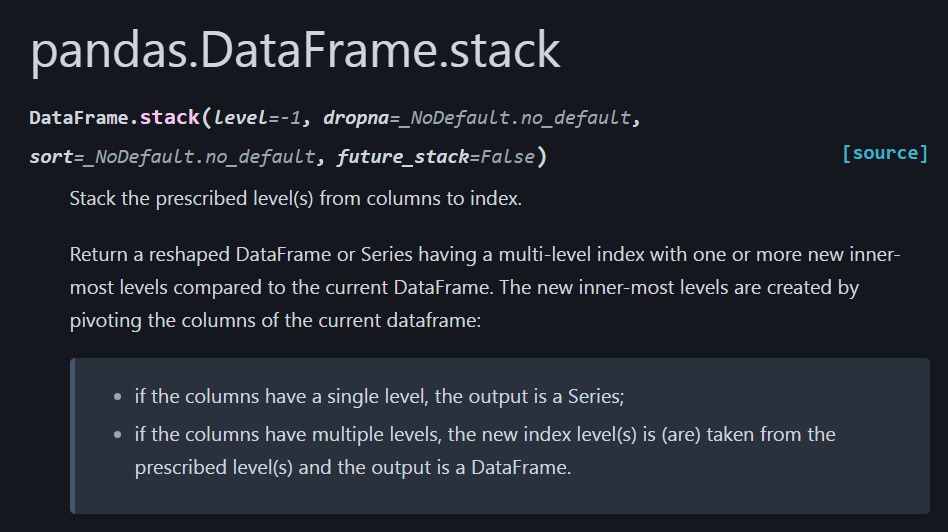

In [939]:
# df_st = df.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,3:34].stack().reset_index().rename(columns={0:'ความกดอากาศ (เปอร์เซ็นต์)','level_3':'วัน'})

In [940]:
df_unit_dict = {
  "ความกดอากาศ (เปอร์เซ็นต์)": df_air_list,
  "ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)": df_humidity_list,
  "ความเร็วลม (นอต)": df_wind_list,
  "จำนวนเมฆ (10ส่วน)": df_cloud_list,
  "ปริมาณฝน (มิลลิเมตร)": df_rain_list,
  "อุณหภูมิจุดน้ำค้าง (เซลเซียส)": df_dew_list,
  "อุณหภูมิต่ำสุด (เซลเซียส)": df_mindegree_list,
  "อุณหภูมิตุ้มแห้ง (เซลเซียส)": df_bulb_list
}

In [941]:
df_air_list = [Air_Pressure_KhonKaen, Air_Pressure_NakhonPhanom, Air_Pressure_SakonNakhon, Air_Pressure_NongKhai, Air_Pressure_Loei]

for df in df_air_list:
  df_st = df.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความกดอากาศ (เปอร์เซ็นต์)','level_3':'DAY'})
  print(df_st)

      เดือน    ปี  จังหวัด  DAY  ความกดอากาศ (เปอร์เซ็นต์)
0        10  2011  ขอนแก่น    1                1005.470000
1        10  2011  ขอนแก่น    2                1006.650000
2        10  2011  ขอนแก่น    3                1007.490000
3        10  2011  ขอนแก่น    4                1008.280000
4        10  2011  ขอนแก่น    5                1009.880000
...     ...   ...      ...  ...                        ...
1700      2  2022  ขอนแก่น   27                1014.370000
1701      2  2022  ขอนแก่น   28                1013.040000
1702      2  2022  ขอนแก่น   29                1013.370000
1703      2  2022  ขอนแก่น   30                1013.980000
1704      2  2022  ขอนแก่น   31                1012.456667

[1705 rows x 5 columns]
      เดือน    ปี จังหวัด  DAY  ความกดอากาศ (เปอร์เซ็นต์)
0        10  2011  นครพนม    1                   1006.300
1        10  2011  นครพนม    2                   1007.380
2        10  2011  นครพนม    3                   1008.070
3        10  2011  นครพนม    4     

ใช้คำสั่งวนลูป syntax ที่เก็บตัวแปรด้วยไม่ได้ครับ

In [943]:
#ความกดอากาศ
Air_Pressure_KhonKaen_st = Air_Pressure_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความกดอากาศ (เปอร์เซ็นต์)','level_3':'วัน'})
Air_Pressure_NakhonPhanom_st = Air_Pressure_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความกดอากาศ (เปอร์เซ็นต์)','level_3':'วัน'})
Air_Pressure_SakonNakhon_st = Air_Pressure_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความกดอากาศ (เปอร์เซ็นต์)','level_3':'วัน'})
Air_Pressure_NongKhai_st = Air_Pressure_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความกดอากาศ (เปอร์เซ็นต์)','level_3':'วัน'})
Air_Pressure_Loei_st = Air_Pressure_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความกดอากาศ (เปอร์เซ็นต์)','level_3':'วัน'})

#ความชื้นสัมพัทธ์
Relative_Humidity_KhonKaen_st = Relative_Humidity_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)','level_3':'วัน'})
Relative_Humidity_NakhonPhanom_st = Relative_Humidity_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)','level_3':'วัน'})
Relative_Humidity_SakonNakhon_st = Relative_Humidity_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)','level_3':'วัน'})
Relative_Humidity_NongKhai_st = Relative_Humidity_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)','level_3':'วัน'})
Relative_Humidity_Loei_st = Relative_Humidity_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)','level_3':'วัน'})

#ความเร็วลม
Wind_Speed_KhonKaen_st = Wind_Speed_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_3':'วัน'})
Wind_Speed_NakhonPhanom_st = Wind_Speed_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_3':'วัน'})
Wind_Speed_SakonNakhon_st = Wind_Speed_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_3':'วัน'})
Wind_Speed_NongKhai_st = Wind_Speed_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_3':'วัน'})
Wind_Speed_Loei_st = Wind_Speed_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ความเร็วลม (นอต)','level_3':'วัน'})

#จำนวนเมฆ
Num_Clouds_KhonKaen_st = Num_Clouds_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10ส่วน)','level_3':'วัน'})
Num_Clouds_NakhonPhanom_st = Num_Clouds_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10ส่วน)','level_3':'วัน'})
Num_Clouds_SakonNakhon_st = Num_Clouds_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10ส่วน)','level_3':'วัน'})
Num_Clouds_NongKhai_st = Num_Clouds_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10ส่วน)','level_3':'วัน'})
Num_Clouds_Loei_st = Num_Clouds_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'จำนวนเมฆ (10ส่วน)','level_3':'วัน'})

#ปริมาณฝน
Rainfall_KhonKaen_st = Rainfall_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลลิเมตร)','level_3':'วัน'})
Rainfall_NakhonPhanom_st = Rainfall_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลลิเมตร)','level_3':'วัน'})
Rainfall_SakonNakhon_st = Rainfall_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลลิเมตร)','level_3':'วัน'})
Rainfall_NongKhai_st = Rainfall_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลลิเมตร)','level_3':'วัน'})
Rainfall_Loei_st = Rainfall_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'ปริมาณฝน (มิลลิเมตร)','level_3':'วัน'})

#อุณหภูมิจุดน้ำค้าง
Dew_Point_KhonKaen_st = Dew_Point_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_3':'วัน'})
Dew_Point_NakhonPhanom_st = Dew_Point_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_3':'วัน'})
Dew_Point_SakonNakhon_st = Dew_Point_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_3':'วัน'})
Dew_Point_NongKhai_st = Dew_Point_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_3':'วัน'})
Dew_Point_Loei_st = Dew_Point_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง (เซลเซียส)','level_3':'วัน'})

#อุณหภูมิต่ำสุด
Min_Degree_KhonKaen_st = Min_Degree_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส)','level_3':'วัน'})
Min_Degree_NakhonPhanom_st = Min_Degree_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส)','level_3':'วัน'})
Min_Degree_SakonNakhon_st = Min_Degree_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส)','level_3':'วัน'})
Min_Degree_NongKhai_st = Min_Degree_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส)','level_3':'วัน'})
Min_Degree_Loei_st = Min_Degree_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด (เซลเซียส)','level_3':'วัน'})

#อุณหภูมิตุ้มแห้ง
Dry_Bulb_KhonKaen_st = Dry_Bulb_KhonKaen.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_3':'วัน'})
Dry_Bulb_NakhonPhanom_st = Dry_Bulb_NakhonPhanom.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_3':'วัน'})
Dry_Bulb_SakonNakhon_st = Dry_Bulb_SakonNakhon.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_3':'วัน'})
Dry_Bulb_NongKhai_st = Dry_Bulb_NongKhai.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_3':'วัน'})
Dry_Bulb_Loei_st = Dry_Bulb_Loei.set_index(["เดือน",'ปี',"จังหวัด"]).iloc[:,2:33].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง (เซลเซียส)','level_3':'วัน'})

### Set Key


In [945]:
#ความกดอากาศ
Air_Pressure_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Air_Pressure_KhonKaen_st['จังหวัด']))]
Air_Pressure_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Air_Pressure_NakhonPhanom_st['จังหวัด']))]
Air_Pressure_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Air_Pressure_SakonNakhon_st['จังหวัด']))]
Air_Pressure_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Air_Pressure_NongKhai_st['จังหวัด']))]
Air_Pressure_Loei_st['Code']=["LO{}".format(i) for i in range(len(Air_Pressure_Loei_st['จังหวัด']))]

#ความชื้นสัมพัทธ์
Relative_Humidity_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Relative_Humidity_KhonKaen_st['จังหวัด']))]
Relative_Humidity_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Relative_Humidity_NakhonPhanom_st['จังหวัด']))]
Relative_Humidity_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Relative_Humidity_SakonNakhon_st['จังหวัด']))]
Relative_Humidity_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Relative_Humidity_NongKhai_st['จังหวัด']))]
Relative_Humidity_Loei_st['Code']=["LO{}".format(i) for i in range(len(Relative_Humidity_Loei_st['จังหวัด']))]

#ความเร็วลม
Wind_Speed_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Wind_Speed_KhonKaen_st['จังหวัด']))]
Wind_Speed_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Wind_Speed_NakhonPhanom_st['จังหวัด']))]
Wind_Speed_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Wind_Speed_SakonNakhon_st['จังหวัด']))]
Wind_Speed_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Wind_Speed_NongKhai_st['จังหวัด']))]
Wind_Speed_Loei_st['Code']=["LO{}".format(i) for i in range(len(Wind_Speed_Loei_st['จังหวัด']))]

#จำนวนเมฆ
Num_Clouds_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Num_Clouds_KhonKaen_st['จังหวัด']))]
Num_Clouds_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Num_Clouds_NakhonPhanom_st['จังหวัด']))]
Num_Clouds_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Num_Clouds_SakonNakhon_st['จังหวัด']))]
Num_Clouds_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Num_Clouds_NongKhai_st['จังหวัด']))]
Num_Clouds_Loei_st['Code']=["LO{}".format(i) for i in range(len(Num_Clouds_Loei_st['จังหวัด']))]

#ปริมาณฝน
Rainfall_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Rainfall_KhonKaen_st['จังหวัด']))]
Rainfall_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Rainfall_NakhonPhanom_st['จังหวัด']))]
Rainfall_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Rainfall_SakonNakhon_st['จังหวัด']))]
Rainfall_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Rainfall_NongKhai_st['จังหวัด']))]
Rainfall_Loei_st['Code']=["LO{}".format(i) for i in range(len(Rainfall_Loei_st['จังหวัด']))]

#อุณหภูมิจุดน้ำค้าง
Dew_Point_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Dew_Point_KhonKaen_st['จังหวัด']))]
Dew_Point_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Dew_Point_NakhonPhanom_st['จังหวัด']))]
Dew_Point_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Dew_Point_SakonNakhon_st['จังหวัด']))]
Dew_Point_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Dew_Point_NongKhai_st['จังหวัด']))]
Dew_Point_Loei_st['Code']=["LO{}".format(i) for i in range(len(Dew_Point_Loei_st['จังหวัด']))]

#อุณหภูมิต่ำสุด
Min_Degree_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Min_Degree_KhonKaen_st['จังหวัด']))]
Min_Degree_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Min_Degree_NakhonPhanom_st['จังหวัด']))]
Min_Degree_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Min_Degree_SakonNakhon_st['จังหวัด']))]
Min_Degree_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Min_Degree_NongKhai_st['จังหวัด']))]
Min_Degree_Loei_st['Code']=["LO{}".format(i) for i in range(len(Min_Degree_Loei_st['จังหวัด']))]

#อุณหภูมิตุ้มแห้ง
Dry_Bulb_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Dry_Bulb_KhonKaen_st['จังหวัด']))]
Dry_Bulb_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Dry_Bulb_NakhonPhanom_st['จังหวัด']))]
Dry_Bulb_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Dry_Bulb_SakonNakhon_st['จังหวัด']))]
Dry_Bulb_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Dry_Bulb_NongKhai_st['จังหวัด']))]
Dry_Bulb_Loei_st['Code']=["LO{}".format(i) for i in range(len(Dry_Bulb_Loei_st['จังหวัด']))]

### เรียงลำดับ Column

In [947]:
col_ap = Air_Pressure_KhonKaen_st.columns.tolist()
col_ap = col_ap[-1:] + col_ap[:-1]
col_ap

col_rh = Relative_Humidity_KhonKaen_st.columns.tolist()
col_rh = col_rh[-1:] + col_rh[:-1]
col_rh

col_ws = Wind_Speed_KhonKaen_st.columns.tolist()
col_ws = col_ws[-1:] + col_ws[:-1]
col_ws

col_nc = Num_Clouds_KhonKaen_st.columns.tolist()
col_nc = col_nc[-1:] + col_nc[:-1]
col_nc

col_rf = Rainfall_KhonKaen_st.columns.tolist()
col_rf = col_rf[-1:] + col_rf[:-1]
col_rf

col_dp = Dew_Point_KhonKaen_st.columns.tolist()
col_dp = col_dp[-1:] + col_dp[:-1]
col_dp

col_md = Min_Degree_KhonKaen_st.columns.tolist()
col_md = col_md[-1:] + col_md[:-1]
col_md

col_db = Dry_Bulb_KhonKaen_st.columns.tolist()
col_db = col_db[-1:] + col_db[:-1]
col_db

['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']

In [948]:
dataframes = {
    "Air_Pressure_KhonKaen": Air_Pressure_KhonKaen_st,
    "Relative_Humidity_KhonKaen": Relative_Humidity_KhonKaen_st,
    "Wind_Speed_KhonKaen": Wind_Speed_KhonKaen_st,
    "Num_Clouds_KhonKaen": Num_Clouds_KhonKaen_st,
    "Rainfall_KhonKaen": Rainfall_KhonKaen_st,
    "Dew_Point_KhonKaen": Dew_Point_KhonKaen_st,
    "Min_Degree_KhonKaen": Min_Degree_KhonKaen_st,
    "Dry_Bulb_KhonKaen": Dry_Bulb_KhonKaen_st,
}

for name, df in dataframes.items():
    col_list = df.columns.tolist()
    col_list = col_list[-1:] + col_list[:-1]
    print(f"{name}_st.columns = {col_list}")

Air_Pressure_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'ความกดอากาศ (เปอร์เซ็นต์)']
Relative_Humidity_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'ความชื้นสัมพัทธ์ (เปอร์เซ็นต์)']
Wind_Speed_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'ความเร็วลม (นอต)']
Num_Clouds_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'จำนวนเมฆ (10ส่วน)']
Rainfall_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'ปริมาณฝน (มิลลิเมตร)']
Dew_Point_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'อุณหภูมิจุดน้ำค้าง (เซลเซียส)']
Min_Degree_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'อุณหภูมิต่ำสุด (เซลเซียส)']
Dry_Bulb_KhonKaen_st.columns = ['Code', 'เดือน', 'ปี', 'จังหวัด', 'วัน', 'อุณหภูมิตุ้มแห้ง (เซลเซียส)']


In [ ]:
#ความกดอากาศ
Airpressure_temp_KhonKaen_mit=Airpressure_temp_KhonKaen_mit[cols_Airpressure]
Airpressure_temp_NakhonPhanom_mit=Airpressure_temp_NakhonPhanom_mit[cols_Airpressure]
Airpressure_temp_Sakon_mit=Airpressure_temp_Sakon_mit[cols_Airpressure]
Airpressure_temp_NongKhai_mit=Airpressure_temp_NongKhai_mit[cols_Airpressure]
Airpressure_temp_loei_mit=Airpressure_temp_loei_mit[cols_Airpressure]

Air_Pressure_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Air_Pressure_KhonKaen_st['จังหวัด']))]
Air_Pressure_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Air_Pressure_NakhonPhanom_st['จังหวัด']))]
Air_Pressure_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Air_Pressure_SakonNakhon_st['จังหวัด']))]
Air_Pressure_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Air_Pressure_NongKhai_st['จังหวัด']))]
Air_Pressure_Loei_st['Code']=["LO{}".format(i) for i in range(len(Air_Pressure_Loei_st['จังหวัด']))]

#ความชื้นสัมพัทธ์
Relative_Humidity_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Relative_Humidity_KhonKaen_st['จังหวัด']))]
Relative_Humidity_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Relative_Humidity_NakhonPhanom_st['จังหวัด']))]
Relative_Humidity_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Relative_Humidity_SakonNakhon_st['จังหวัด']))]
Relative_Humidity_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Relative_Humidity_NongKhai_st['จังหวัด']))]
Relative_Humidity_Loei_st['Code']=["LO{}".format(i) for i in range(len(Relative_Humidity_Loei_st['จังหวัด']))]

#ความเร็วลม
Wind_Speed_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Wind_Speed_KhonKaen_st['จังหวัด']))]
Wind_Speed_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Wind_Speed_NakhonPhanom_st['จังหวัด']))]
Wind_Speed_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Wind_Speed_SakonNakhon_st['จังหวัด']))]
Wind_Speed_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Wind_Speed_NongKhai_st['จังหวัด']))]
Wind_Speed_Loei_st['Code']=["LO{}".format(i) for i in range(len(Wind_Speed_Loei_st['จังหวัด']))]

#จำนวนเมฆ
Num_Clouds_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Num_Clouds_KhonKaen_st['จังหวัด']))]
Num_Clouds_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Num_Clouds_NakhonPhanom_st['จังหวัด']))]
Num_Clouds_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Num_Clouds_SakonNakhon_st['จังหวัด']))]
Num_Clouds_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Num_Clouds_NongKhai_st['จังหวัด']))]
Num_Clouds_Loei_st['Code']=["LO{}".format(i) for i in range(len(Num_Clouds_Loei_st['จังหวัด']))]

#ปริมาณฝน
Rainfall_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Rainfall_KhonKaen_st['จังหวัด']))]
Rainfall_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Rainfall_NakhonPhanom_st['จังหวัด']))]
Rainfall_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Rainfall_SakonNakhon_st['จังหวัด']))]
Rainfall_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Rainfall_NongKhai_st['จังหวัด']))]
Rainfall_Loei_st['Code']=["LO{}".format(i) for i in range(len(Rainfall_Loei_st['จังหวัด']))]

#อุณหภูมิจุดน้ำค้าง
Dew_Point_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Dew_Point_KhonKaen_st['จังหวัด']))]
Dew_Point_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Dew_Point_NakhonPhanom_st['จังหวัด']))]
Dew_Point_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Dew_Point_SakonNakhon_st['จังหวัด']))]
Dew_Point_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Dew_Point_NongKhai_st['จังหวัด']))]
Dew_Point_Loei_st['Code']=["LO{}".format(i) for i in range(len(Dew_Point_Loei_st['จังหวัด']))]

#อุณหภูมิต่ำสุด
Min_Degree_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Min_Degree_KhonKaen_st['จังหวัด']))]
Min_Degree_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Min_Degree_NakhonPhanom_st['จังหวัด']))]
Min_Degree_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Min_Degree_SakonNakhon_st['จังหวัด']))]
Min_Degree_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Min_Degree_NongKhai_st['จังหวัด']))]
Min_Degree_Loei_st['Code']=["LO{}".format(i) for i in range(len(Min_Degree_Loei_st['จังหวัด']))]

#อุณหภูมิตุ้มแห้ง
Dry_Bulb_KhonKaen_st['Code']=["KK{}".format(i) for i in range(len(Dry_Bulb_KhonKaen_st['จังหวัด']))]
Dry_Bulb_NakhonPhanom_st['Code']=["NP{}".format(i) for i in range(len(Dry_Bulb_NakhonPhanom_st['จังหวัด']))]
Dry_Bulb_SakonNakhon_st['Code']=["SK{}".format(i) for i in range(len(Dry_Bulb_SakonNakhon_st['จังหวัด']))]
Dry_Bulb_NongKhai_st['Code']=["NK{}".format(i) for i in range(len(Dry_Bulb_NongKhai_st['จังหวัด']))]
Dry_Bulb_Loei_st['Code']=["LO{}".format(i) for i in range(len(Dry_Bulb_Loei_st['จังหวัด']))]